<a href="https://colab.research.google.com/github/jonshiach/LA-book/blob/main/Bresenhams_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bresenham's algorithm

Jon Shiach

---

Bresenham's line drawing algorithm rasterises a straight line joining two points with pixel co-ordinates `(x0, y0)` and `(x1, y1)` on the raster array `R`. See [Bresenham's algorithm](https://jonshiach.github.io/graphics-book/jupyter-notebooks/1.1_Bresenhams_algorithm.html) for more details.

```
function drawline(R, x0, y0, x1, y1, colour)

x := x0 and y := y0
dx := |x1 - x0| and dy := |y1 - y|
D := \Delta x - \Delta y
xstep := 1 and ystep := 1
if x > x1 then
    xstep := -1 
if y > y1 then
    ystep := -1  
while true do
    R(y,x) := colour
    if x = x1 and y = y1 then
        break
    E := 2D
    if E \geq -\Delta y then
        x := x + xstep
        D := D - \Delta y 
    if E <= \Delta x then
        y := y + ystep
        D := D + \Delta x   

  return R
  ``` 

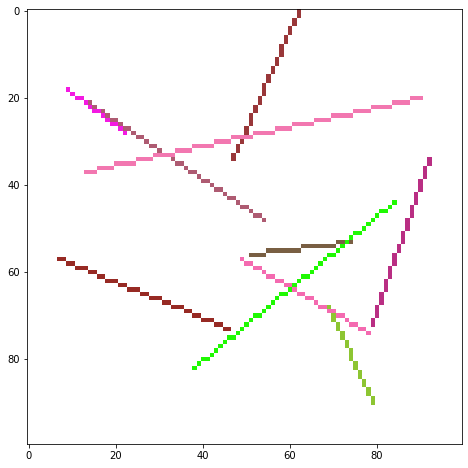

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def drawline(R, x0, y0, x1, y1, colour):
    x, y = x0, y0
    dx, dy = abs(x1 - x0), abs(y1 - y0)
    D = dx - dy
    xstep, ystep = 1, 1
    if x0 > x1:
        xstep = -1
    if y0 > y1:
        ystep = -1

    while True:
        R[y, x, :] = colour
        if x == x1 and y == y1:
            return R
        E = 2 * D
        if E >= -dy:
            x += xstep
            D -= dy
        if E <= dx:
            y += ystep
            D += dx


def pixelcoords(x, y, Nx, Ny):
    xp = int(x * Nx)
    yp = int((1 - y) * Ny)
    return xp, yp


# Initialise raster array (Nx x Ny x 3 integer array of 255's)
Nx, Ny = 100, 100
R = 255 * np.ones((Ny, Nx, 3)).astype(int)

# Draw lines
nlines = 10
for _ in range(nlines):
  
  # Determine random endpoint co-ordinates and line colour
  x0, y0, x1, y1 = [np.random.rand() for _ in range(4)]
  colour = np.random.randint(0, 255, 3)

  # Convert endpoint co-ordinates to pixel co-ordinates
  x0, y0 = pixelcoords(x0, y0, Nx, Ny)
  x1, y1 = pixelcoords(x1, y1, Nx, Ny)
  R = drawline(R, x0, y0, x1, y1, colour)

# Plot raster
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(R)
plt.show()